# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

#for human readable describe format
pd.options.display.float_format = "{:.2f}".format

In [2]:
data = pd.read_csv('/datasets/vehicles_us.csv')

### Load data

In [3]:
# Load the data file into a DataFrame
display(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.00,bmw x5,good,6.00,gas,145000.00,automatic,SUV,NaN,1.00,2018-06-23,19
1,25500,NaN,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50
2,5500,2013.00,hyundai sonata,like new,4.00,gas,110000.00,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.00,ford f-150,fair,8.00,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.00,chrysler 200,excellent,4.00,gas,80903.00,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.00,nissan maxima,like new,6.00,gas,88136.00,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.00,honda civic,salvage,4.00,gas,181500.00,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.00,hyundai sonata,excellent,4.00,gas,128000.00,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.00,toyota corolla,good,4.00,gas,139573.00,automatic,sedan,black,NaN,2018-07-02,71


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [4]:
# print the general/summary information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [5]:
# print a sample of data
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.00,bmw x5,good,6.00,gas,145000.00,automatic,SUV,NaN,1.00,2018-06-23,19
1,25500,NaN,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50
2,5500,2013.00,hyundai sonata,like new,4.00,gas,110000.00,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.00,ford f-150,fair,8.00,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.00,chrysler 200,excellent,4.00,gas,80903.00,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
data['date_posted'] = pd.to_datetime(data['date_posted'])

In [7]:
data['date_posted'].iloc[0]

Timestamp('2018-06-23 00:00:00')

Investigate why is_4wd, model_year, odometer, paint_color have NaN values. 

model_year, cylinders, odometer - I could make them into a int. bc year, cylinders, and odometer are never decimal irl

Missing values NOT across all columns. In order from most missing to least: is_4wd, paint_color, odometer, cylinders, model_year. is_4wd is over half missing values. 

In [8]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

the missing values in is_4wd can only mean "no".  This is a boolean value, were 0 means not 4wd and 1 means yes 4wd

the missing values in model_year means they didn't include the year. I will see if there is a correlation between model year and odometer. If they are correlated, I can determine the mode value for odometer v model year and fill the missing values based on their qcut bin. If the row has both model year and odometer missing, I will caculate the percentage and determine if I can delete from dataframe

the missing string value in paint_color means they didn't include the cars color. I rename the misisng values with 'other' using .fillna() as a string

i will see if cylinders has a stronger correlation with type or model and repeat the process I did with model year and odometer

## Treat missing values (if any)

In [9]:
#fill missing values and check
data['is_4wd'] = data['is_4wd'].fillna(0)
data['is_4wd'].unique().tolist()

[1.0, 0.0]

In [10]:
#fill missing values and check
data['paint_color'] = data['paint_color'].fillna('other')
data['paint_color'].unique().tolist()

['other',
 'white',
 'red',
 'black',
 'blue',
 'grey',
 'silver',
 'custom',
 'orange',
 'yellow',
 'brown',
 'green',
 'purple']

### model_year

In [11]:
#use bins to group data  , we are going to use odometer bin to fill missing model year
#as odometer and model_year tends to be correlated
bins = pd.qcut(data["odometer"], q=25)
display(bins.value_counts())

(103588.24, 110000.0]    1858
(135554.8, 142000.0]     1826
(176688.0, 189000.0]     1813
(122500.0, 129000.0]     1796
(149613.56, 157000.0]    1780
(58143.2, 68000.0]       1780
(12229.84, 26400.0]      1748
(116422.16, 122500.0]    1747
(-0.001, 12229.84]       1746
(97896.2, 103588.24]     1746
(232958.88, 990000.0]    1746
(91324.0, 97896.2]       1745
(84051.24, 91324.0]      1745
(48119.48, 58143.2]      1745
(37380.0, 48119.48]      1744
(26400.0, 37380.0]       1744
(204084.0, 232958.88]    1739
(76000.0, 84051.24]      1734
(157000.0, 166000.0]     1732
(166000.0, 176688.0]     1724
(68000.0, 76000.0]       1722
(129000.0, 135554.8]     1693
(189000.0, 204084.0]     1683
(142000.0, 149613.56]    1665
(110000.0, 116422.16]    1632
Name: odometer, dtype: int64

In [12]:
#put back the bin value to your original df #always check

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,bin
0,9400,2011.00,bmw x5,good,6.00,gas,145000.00,automatic,SUV,other,1.00,2018-06-23,19,"(142000.0, 149613.56]"
1,25500,NaN,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50,"(84051.24, 91324.0]"
2,5500,2013.00,hyundai sonata,like new,4.00,gas,110000.00,automatic,sedan,red,0.00,2019-02-07,79,"(103588.24, 110000.0]"
3,1500,2003.00,ford f-150,fair,8.00,gas,NaN,automatic,pickup,other,0.00,2019-03-22,9,NaN
4,14900,2017.00,chrysler 200,excellent,4.00,gas,80903.00,automatic,sedan,black,0.00,2019-04-02,28,"(76000.0, 84051.24]"


In [13]:
data['bin'].value_counts()

(103588.24, 110000.0]    1858
(135554.8, 142000.0]     1826
(176688.0, 189000.0]     1813
(122500.0, 129000.0]     1796
(149613.56, 157000.0]    1780
(58143.2, 68000.0]       1780
(12229.84, 26400.0]      1748
(116422.16, 122500.0]    1747
(-0.001, 12229.84]       1746
(97896.2, 103588.24]     1746
(232958.88, 990000.0]    1746
(91324.0, 97896.2]       1745
(84051.24, 91324.0]      1745
(48119.48, 58143.2]      1745
(37380.0, 48119.48]      1744
(26400.0, 37380.0]       1744
(204084.0, 232958.88]    1739
(76000.0, 84051.24]      1734
(157000.0, 166000.0]     1732
(166000.0, 176688.0]     1724
(68000.0, 76000.0]       1722
(129000.0, 135554.8]     1693
(189000.0, 204084.0]     1683
(142000.0, 149613.56]    1665
(110000.0, 116422.16]    1632
Name: bin, dtype: int64

In [14]:
#calculate the mode value for each bin
#use the mode of modelyear in each bin, likely taking the most popular year within the bin group
df_agg = data[[ "model_year","bin"]].groupby('bin').agg(pd.Series.mode).reset_index()

df_agg.columns = ['bin','model_year_agg']
display(df_agg)

,bin,model_year_agg
0,"(-0.001, 12229.84]",2018.00
1,"(12229.84, 26400.0]",2018.00
2,"(26400.0, 37380.0]",2017.00
3,"(37380.0, 48119.48]",2016.00
4,"(48119.48, 58143.2]",2016.00
5,"(58143.2, 68000.0]",2015.00
6,"(68000.0, 76000.0]",2014.00
7,"(76000.0, 84051.24]",2014.00
8,"(84051.24, 91324.0]",2014.00
9,"(91324.0, 97896.2]",2013.00


In [15]:
#seems to be consiste more mile older the car

In [16]:
#left join your agg df to your original df using bin as a key
#always check the data size before and after the join to make sure your datasize is what you expected
#it was creating the join on all columns which would make your current dataset x. 1000
#you ran out of memory
print(data.shape)
data = pd.merge(data, df_agg, how='left', on='bin')
print(data.shape)

(51525, 14)
(51525, 15)


In [17]:
#visually inspect
display(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,bin,model_year_agg
0,9400,2011.00,bmw x5,good,6.00,gas,145000.00,automatic,SUV,other,1.00,2018-06-23,19,"(142000.0, 149613.56]",2011.00
1,25500,NaN,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50,"(84051.24, 91324.0]",2014.00
2,5500,2013.00,hyundai sonata,like new,4.00,gas,110000.00,automatic,sedan,red,0.00,2019-02-07,79,"(103588.24, 110000.0]",2013.00
3,1500,2003.00,ford f-150,fair,8.00,gas,NaN,automatic,pickup,other,0.00,2019-03-22,9,NaN,NaN
4,14900,2017.00,chrysler 200,excellent,4.00,gas,80903.00,automatic,sedan,black,0.00,2019-04-02,28,"(76000.0, 84051.24]",2014.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.00,nissan maxima,like new,6.00,gas,88136.00,automatic,sedan,black,0.00,2018-10-03,37,"(84051.24, 91324.0]",2014.00
51521,2700,2002.00,honda civic,salvage,4.00,gas,181500.00,automatic,sedan,white,0.00,2018-11-14,22,"(176688.0, 189000.0]",2008.00
51522,3950,2009.00,hyundai sonata,excellent,4.00,gas,128000.00,automatic,sedan,blue,0.00,2018-11-15,32,"(122500.0, 129000.0]",2011.00
51523,7455,2013.00,toyota corolla,good,4.00,gas,139573.00,automatic,sedan,black,0.00,2018-07-02,71,"(135554.8, 142000.0]",2007.00


In [18]:
#use apply function to replace the missing value
#we are iterating row by row
#always work on the temporary column until you are happy with the result otherwise
#needto rerun from the top
data['model_year_temp'] = data.apply (lambda row: \
            row['model_year_agg'] if np.isnan(row['model_year']) else row['model_year'], axis=1)



In [19]:
#visually inspect
display(data[data['model_year'].isnull()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,bin,model_year_agg,model_year_temp
1,25500,NaN,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50,"(84051.24, 91324.0]",2014.00,2014.00
20,6990,NaN,chevrolet tahoe,excellent,8.00,gas,147485.00,automatic,SUV,silver,1.00,2018-08-05,28,"(142000.0, 149613.56]",2011.00,2011.00
65,12800,NaN,ford f-150,excellent,6.00,gas,108500.00,automatic,pickup,white,0.00,2018-09-23,15,"(103588.24, 110000.0]",2013.00,2013.00
69,7800,NaN,ford f-150,like new,8.00,gas,97510.00,automatic,truck,white,1.00,2019-02-20,39,"(91324.0, 97896.2]",2013.00,2013.00
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.00,automatic,sedan,blue,1.00,2018-08-07,60,"(68000.0, 76000.0]",2014.00,2014.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.00,gas,135778.00,automatic,truck,red,1.00,2018-11-28,24,"(135554.8, 142000.0]",2007.00,2007.00
51465,34595,NaN,gmc yukon,excellent,8.00,gas,86456.00,automatic,SUV,silver,1.00,2019-04-18,13,"(84051.24, 91324.0]",2014.00,2014.00
51487,1495,NaN,ford f-150,fair,6.00,gas,15804.00,manual,truck,white,1.00,2018-09-18,56,"(12229.84, 26400.0]",2018.00,2018.00
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.00,diesel,203000.00,automatic,truck,white,1.00,2018-12-27,37,"(189000.0, 204084.0]",2008.00,2008.00


In [20]:
#originally we were missing 3619 rows
#still have 549 records missing bcs it's also missing odmeter so no bin was assigned

# also check if new model_year_temp column is missing any value
display(data[data['model_year_temp'].isnull()])



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,bin,model_year_agg,model_year_temp
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.00,2018-07-24,73,NaN,NaN,NaN
260,14975,NaN,toyota 4runner,good,6.00,gas,NaN,automatic,SUV,silver,0.00,2018-05-13,57,NaN,NaN,NaN
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.00,2019-01-14,50,NaN,NaN,NaN
586,26000,NaN,toyota rav4,like new,4.00,gas,NaN,automatic,SUV,other,0.00,2018-08-09,29,NaN,NaN,NaN
659,8400,NaN,volkswagen jetta,good,4.00,diesel,NaN,manual,wagon,other,0.00,2018-10-22,37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.00,diesel,NaN,automatic,truck,white,1.00,2018-05-10,35,NaN,NaN,NaN
51222,1000,NaN,acura tl,good,6.00,gas,NaN,automatic,sedan,grey,0.00,2018-12-09,23,NaN,NaN,NaN
51257,6500,NaN,toyota corolla,good,4.00,gas,NaN,automatic,sedan,white,0.00,2018-10-16,75,NaN,NaN,NaN
51295,3850,NaN,hyundai elantra,excellent,4.00,gas,NaN,automatic,sedan,silver,0.00,2019-03-16,83,NaN,NaN,NaN


In [21]:
data['model_year'] = data['model_year_temp']

In [22]:
drop_cols = ['bin','model_year_agg','model_year_temp' ]
data.drop(labels=drop_cols, axis=1, inplace=True)

In [23]:
display(data[data['model_year'].isnull()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.00,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.00,gas,NaN,automatic,SUV,silver,0.00,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.00,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.00,gas,NaN,automatic,SUV,other,0.00,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.00,diesel,NaN,manual,wagon,other,0.00,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.00,diesel,NaN,automatic,truck,white,1.00,2018-05-10,35
51222,1000,NaN,acura tl,good,6.00,gas,NaN,automatic,sedan,grey,0.00,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.00,gas,NaN,automatic,sedan,white,0.00,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.00,gas,NaN,automatic,sedan,silver,0.00,2019-03-16,83


In [24]:
#check
#we decided to drop 1% of the records which are missing the odometer value
print(data.shape)
data  = data[~data['model_year'].isnull()]
print(data.shape)

(51525, 13)
(50976, 13)


In [25]:
#check for any missing value
display( data[data['model_year'].isnull()] )
print(data['model_year'].isnull().sum())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


0


### cylinders

In [26]:
#use bins to group data
#cylinders tends to be correlated with price
bins = pd.qcut(data["price"], q=15)
display(bins.value_counts())

(2495.0, 3500.0]         3682
(8500.0, 9995.0]         3670
(3500.0, 4500.0]         3601
(13900.0, 15995.0]       3585
(7450.0, 8500.0]         3482
(0.999, 2495.0]          3426
(5450.0, 6300.0]         3412
(28595.333, 375000.0]    3399
(22990.0, 28595.333]     3396
(6300.0, 7450.0]         3384
(11900.0, 13900.0]       3383
(18950.0, 22990.0]       3374
(15995.0, 18950.0]       3192
(9995.0, 11900.0]        3101
(4500.0, 5450.0]         2889
Name: price, dtype: int64

In [27]:
#put back the bin value to your original df
data['bin'] = pd.qcut(data['price'], q=15)
display(data.head()) #always check

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,bin
0,9400,2011.00,bmw x5,good,6.00,gas,145000.00,automatic,SUV,other,1.00,2018-06-23,19,"(8500.0, 9995.0]"
1,25500,2014.00,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50,"(22990.0, 28595.333]"
2,5500,2013.00,hyundai sonata,like new,4.00,gas,110000.00,automatic,sedan,red,0.00,2019-02-07,79,"(5450.0, 6300.0]"
3,1500,2003.00,ford f-150,fair,8.00,gas,NaN,automatic,pickup,other,0.00,2019-03-22,9,"(0.999, 2495.0]"
4,14900,2017.00,chrysler 200,excellent,4.00,gas,80903.00,automatic,sedan,black,0.00,2019-04-02,28,"(13900.0, 15995.0]"


In [28]:
#check if bins make sense
data['bin'].value_counts()

(2495.0, 3500.0]         3682
(8500.0, 9995.0]         3670
(3500.0, 4500.0]         3601
(13900.0, 15995.0]       3585
(7450.0, 8500.0]         3482
(0.999, 2495.0]          3426
(5450.0, 6300.0]         3412
(28595.333, 375000.0]    3399
(22990.0, 28595.333]     3396
(6300.0, 7450.0]         3384
(11900.0, 13900.0]       3383
(18950.0, 22990.0]       3374
(15995.0, 18950.0]       3192
(9995.0, 11900.0]        3101
(4500.0, 5450.0]         2889
Name: bin, dtype: int64

In [29]:
#calculate the mode value for each bin
# we will use the mode of modelyear in each bin, likely taking the most popular year within the bin group

df_agg = data[[ "cylinders","bin"]].groupby('bin').agg(pd.Series.mode).reset_index()

df_agg.columns = ['bin','cyl_agg']
display(df_agg)

,bin,cyl_agg
0,"(0.999, 2495.0]",4.00
1,"(2495.0, 3500.0]",6.00
2,"(3500.0, 4500.0]",4.00
3,"(4500.0, 5450.0]",4.00
4,"(5450.0, 6300.0]",4.00
5,"(6300.0, 7450.0]",4.00
6,"(7450.0, 8500.0]",4.00
7,"(8500.0, 9995.0]",4.00
8,"(9995.0, 11900.0]",8.00
9,"(11900.0, 13900.0]",8.00


In [30]:
#left join your agg df to your original df using bin as a key
#always check the data size before and after the join to make sure your datasize is what you expected
#it was creating the join on all columns which would make your current dataset x. 1000
#you ran out of memory
print(data.shape)
data = pd.merge(data, df_agg, how='left', on='bin')
print(data.shape)

(50976, 14)
(50976, 15)


In [31]:
#visually inspect
display(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,bin,cyl_agg
0,9400,2011.00,bmw x5,good,6.00,gas,145000.00,automatic,SUV,other,1.00,2018-06-23,19,"(8500.0, 9995.0]",4.00
1,25500,2014.00,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50,"(22990.0, 28595.333]",8.00
2,5500,2013.00,hyundai sonata,like new,4.00,gas,110000.00,automatic,sedan,red,0.00,2019-02-07,79,"(5450.0, 6300.0]",4.00
3,1500,2003.00,ford f-150,fair,8.00,gas,NaN,automatic,pickup,other,0.00,2019-03-22,9,"(0.999, 2495.0]",4.00
4,14900,2017.00,chrysler 200,excellent,4.00,gas,80903.00,automatic,sedan,black,0.00,2019-04-02,28,"(13900.0, 15995.0]",8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50971,9249,2013.00,nissan maxima,like new,6.00,gas,88136.00,automatic,sedan,black,0.00,2018-10-03,37,"(8500.0, 9995.0]",4.00
50972,2700,2002.00,honda civic,salvage,4.00,gas,181500.00,automatic,sedan,white,0.00,2018-11-14,22,"(2495.0, 3500.0]",6.00
50973,3950,2009.00,hyundai sonata,excellent,4.00,gas,128000.00,automatic,sedan,blue,0.00,2018-11-15,32,"(3500.0, 4500.0]",4.00
50974,7455,2013.00,toyota corolla,good,4.00,gas,139573.00,automatic,sedan,black,0.00,2018-07-02,71,"(7450.0, 8500.0]",4.00


In [32]:
#use apply function to replace the missing value
#we are iterating row by row
#always work on the temporary column until you are happy with the result otherwise
#needto rerun from the top

data['cylinder_temp'] = data.apply (lambda row: \
           row['cyl_agg'] if np.isnan(row['cylinders']) else row['cylinders'], axis=1)




In [33]:
data['cylinders'] = data['cylinder_temp']

In [34]:
#visually inspect
data['cylinders'].unique().tolist()

[6.0, 4.0, 8.0, 5.0, 10.0, 3.0, 12.0]

In [35]:
data['cylinders'].isnull().sum()

0

In [36]:
drop_cols = ['bin','cyl_agg','cylinder_temp' ]
data.drop(labels=drop_cols, axis=1, inplace=True)

### odometer 

In [37]:
#use bins to group data  , we are going to use odometer bin to fill missing model year
#as odometer and model_year tends to be correlated
bins = pd.qcut(data["model_year"], q=10)
display(bins.value_counts())

(2012.0, 2014.0]      7748
(2009.0, 2011.0]      6680
(1907.999, 2003.0]    6479
(2015.0, 2017.0]      5689
(2007.0, 2009.0]      5531
(2005.0, 2007.0]      5234
(2003.0, 2005.0]      3872
(2011.0, 2012.0]      3468
(2014.0, 2015.0]      3463
(2017.0, 2019.0]      2812
Name: model_year, dtype: int64

In [38]:
#put back the bin value to your original df
data['bin'] = pd.qcut(data['model_year'], q=10)
display(data.head()) #always check

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,bin
0,9400,2011.00,bmw x5,good,6.00,gas,145000.00,automatic,SUV,other,1.00,2018-06-23,19,"(2009.0, 2011.0]"
1,25500,2014.00,ford f-150,good,6.00,gas,88705.00,automatic,pickup,white,1.00,2018-10-19,50,"(2012.0, 2014.0]"
2,5500,2013.00,hyundai sonata,like new,4.00,gas,110000.00,automatic,sedan,red,0.00,2019-02-07,79,"(2012.0, 2014.0]"
3,1500,2003.00,ford f-150,fair,8.00,gas,NaN,automatic,pickup,other,0.00,2019-03-22,9,"(1907.999, 2003.0]"
4,14900,2017.00,chrysler 200,excellent,4.00,gas,80903.00,automatic,sedan,black,0.00,2019-04-02,28,"(2015.0, 2017.0]"


In [39]:
# this step helps me pick the number of bins I want. First attempt was q=10, bins were not even
# q=15 works well 
data['bin'].value_counts()

(2012.0, 2014.0]      7748
(2009.0, 2011.0]      6680
(1907.999, 2003.0]    6479
(2015.0, 2017.0]      5689
(2007.0, 2009.0]      5531
(2005.0, 2007.0]      5234
(2003.0, 2005.0]      3872
(2011.0, 2012.0]      3468
(2014.0, 2015.0]      3463
(2017.0, 2019.0]      2812
Name: bin, dtype: int64

In [40]:
#calculate the median value for each bin
# we will use the mode of modelyear in each bin, likely taking the most popular year within the bin group
df_agg = data[[ "odometer","bin"]].groupby('bin').agg(pd.Series.median).reset_index()

df_agg.columns = ['bin', 'odo_agg']
display(df_agg)

,bin,odo_agg
0,"(1907.999, 2003.0]",163959.00
1,"(2003.0, 2005.0]",157418.00
2,"(2005.0, 2007.0]",148483.50
3,"(2007.0, 2009.0]",144684.50
4,"(2009.0, 2011.0]",125000.00
5,"(2011.0, 2012.0]",110517.50
6,"(2012.0, 2014.0]",94813.00
7,"(2014.0, 2015.0]",76000.00
8,"(2015.0, 2017.0]",47110.00
9,"(2017.0, 2019.0]",18359.50


In [41]:
#left join your agg df to your original df using bin as a key
#always check the data size before and after the join to make sure your datasize is what you expected

print(data.shape)
data = pd.merge(data, df_agg, how='left', on='bin')
print(data.shape)

(50976, 14)
(50976, 15)


In [42]:
#use apply function to replace the missing value
#we are iterating row by row
#always work on the temporary column until you are happy with the result otherwise

data['odo_temp'] = data.apply (lambda row: \
            row['odo_agg'] if np.isnan(row['odometer']) else row['odometer'], axis=1)


In [43]:
#visually inspect
data['odometer'].isnull().sum()

7343

In [44]:
#visually inspect
data['odo_temp'].isnull().sum()

0

In [45]:
data['odometer'] = data['odo_temp']

In [46]:
#visually inspect
data['odometer'].isnull().sum()

0

In [47]:
#visually inspect
data['odometer'].describe()

count    50976.00
mean    115294.91
std      62415.62
min          0.00
25%      73022.50
50%     114000.00
75%     153858.75
max     990000.00
Name: odometer, dtype: float64

In [48]:
drop_cols = ['bin','odo_agg','odo_temp' ]
data.drop(labels=drop_cols, axis=1, inplace=True)

## Fix data types

[As the data is more or less complete now, fix the data types if required.]

In [49]:
#check 
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [50]:
data['model_year'] = data['model_year'].astype(int)

In [51]:
data['cylinders'] = data['cylinders'].astype(int)

In [52]:
data['odometer'] = data['odometer'].astype(int)

In [53]:
data['is_4wd'] = data['is_4wd'].astype(int)

In [54]:
data['days_listed'] = data['days_listed'].astype(int)

In [55]:
data['price'] = data['price'].astype(int)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 50975
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50976 non-null  int64         
 1   model_year    50976 non-null  int64         
 2   model         50976 non-null  object        
 3   condition     50976 non-null  object        
 4   cylinders     50976 non-null  int64         
 5   fuel          50976 non-null  object        
 6   odometer      50976 non-null  int64         
 7   transmission  50976 non-null  object        
 8   type          50976 non-null  object        
 9   paint_color   50976 non-null  object        
 10  is_4wd        50976 non-null  int64         
 11  date_posted   50976 non-null  datetime64[ns]
 12  days_listed   50976 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.4+ MB


## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [57]:
# Add datetime values for when the ad was placed

data['day_of_week'] = pd.DatetimeIndex(data['date_posted']).weekday

data['day_of_week']



0        5
1        4
2        3
3        4
4        1
        ..
50971    2
50972    2
50973    3
50974    0
50975    1
Name: day_of_week, Length: 50976, dtype: int64

In [58]:
data['date'] = data['date_posted'].dt.day
data['date'].unique().tolist()

[23,
 19,
 7,
 22,
 2,
 20,
 27,
 16,
 15,
 17,
 28,
 14,
 31,
 30,
 9,
 25,
 5,
 11,
 26,
 18,
 13,
 12,
 4,
 8,
 10,
 3,
 29,
 1,
 24,
 6,
 21]

In [59]:
data['month'] = data['date_posted'].dt.month
data['month'].unique().tolist()

[6, 10, 2, 3, 4, 12, 1, 7, 9, 5, 8, 11]

In [60]:
data['year'] = data['date_posted'].dt.year

data['year'].unique().tolist()

[2018, 2019]

In [61]:
data["ad_placed"] = pd.DatetimeIndex(data.date_posted).strftime("%A %B %d, %Y")

In [62]:
data['ad_placed'].head()

0        Saturday June 23, 2018
1       Friday October 19, 2018
2    Thursday February 07, 2019
3         Friday March 22, 2019
4        Tuesday April 02, 2019
Name: ad_placed, dtype: object

1) examine the correlations btw odometer vs model year
2) if strong relationship btw 2 variables in step1
3) create bin values 7~15 of odometer and calculate the mode (most frequent model year) 
of the model year for each binned odometer
4) fill missing values (odometer ) using model year

5) create bin values 7~15 of model year and calculate the mean/median (odometer) 
of the odometer for each binned  model year
6) fill missing values (model year) using odometer


In [63]:
#The vehicle's age (in years) when the ad was placed
data['vehicle_age'] = data['year'] - data['model_year']+1 #reflect vehicle model year
data['vehicle_age'].unique().tolist()


[8,
 5,
 7,
 17,
 3,
 4,
 12,
 2,
 11,
 6,
 9,
 1,
 16,
 15,
 10,
 14,
 18,
 13,
 54,
 25,
 19,
 20,
 27,
 23,
 39,
 21,
 24,
 45,
 22,
 26,
 34,
 43,
 32,
 44,
 30,
 29,
 47,
 53,
 50,
 31,
 41,
 55,
 40,
 51,
 28,
 33,
 56,
 38,
 57,
 35,
 46,
 42,
 52,
 64,
 48,
 49,
 37,
 36,
 66,
 58,
 72,
 59,
 60,
 111,
 83,
 70,
 61,
 90]

In [64]:
# Add the vehicle's average mileage per year

data['annual_mileage'] = data['odometer' ] / data['vehicle_age']
data['annual_mileage'] = data['annual_mileage'].round()
data['annual_mileage'].unique().tolist()

[18125.0,
 17741.0,
 15714.0,
 9645.0,
 26968.0,
 11591.0,
 19803.0,
 15639.0,
 14882.0,
 12266.0,
 16052.0,
 13893.0,
 17593.0,
 11052.0,
 12026.0,
 15802.0,
 14525.0,
 20134.0,
 18332.0,
 31932.0,
 18436.0,
 12833.0,
 11250.0,
 10495.0,
 14468.0,
 23555.0,
 15905.0,
 9842.0,
 8202.0,
 12500.0,
 12479.0,
 17860.0,
 12962.0,
 37500.0,
 13618.0,
 15759.0,
 14674.0,
 11429.0,
 15200.0,
 21273.0,
 18257.0,
 13545.0,
 17091.0,
 10551.0,
 15420.0,
 22576.0,
 11758.0,
 9200.0,
 19645.0,
 5361.0,
 18618.0,
 20996.0,
 13984.0,
 15170.0,
 17904.0,
 11422.0,
 20408.0,
 9839.0,
 14308.0,
 9733.0,
 22872.0,
 17867.0,
 944.0,
 8749.0,
 18083.0,
 14347.0,
 26464.0,
 13930.0,
 27493.0,
 14800.0,
 8.0,
 13153.0,
 13287.0,
 22268.0,
 20610.0,
 10899.0,
 17609.0,
 13721.0,
 10671.0,
 20576.0,
 14167.0,
 13748.0,
 11901.0,
 12585.0,
 9498.0,
 6785.0,
 5611.0,
 22311.0,
 14375.0,
 17789.0,
 52992.0,
 3746.0,
 12857.0,
 15000.0,
 18500.0,
 18456.0,
 20001.0,
 14365.0,
 9357.0,
 12285.0,
 12070.0,
 16168.0,

## Check clean data

In [65]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 50975
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           50976 non-null  int64         
 1   model_year      50976 non-null  int64         
 2   model           50976 non-null  object        
 3   condition       50976 non-null  object        
 4   cylinders       50976 non-null  int64         
 5   fuel            50976 non-null  object        
 6   odometer        50976 non-null  int64         
 7   transmission    50976 non-null  object        
 8   type            50976 non-null  object        
 9   paint_color     50976 non-null  object        
 10  is_4wd          50976 non-null  int64         
 11  date_posted     50976 non-null  datetime64[ns]
 12  days_listed     50976 non-null  int64         
 13  day_of_week     50976 non-null  int64         
 14  date            50976 non-null  int64         
 15  mo

In [66]:
data.isnull().sum()

price             0
model_year        0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
transmission      0
type              0
paint_color       0
is_4wd            0
date_posted       0
days_listed       0
day_of_week       0
date              0
month             0
year              0
ad_placed         0
vehicle_age       0
annual_mileage    0
dtype: int64

In [67]:
# print a sample of data

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,date,month,year,ad_placed,vehicle_age,annual_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,23,6,2018,"Saturday June 23, 2018",8,18125.00
1,25500,2014,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,19,10,2018,"Friday October 19, 2018",5,17741.00
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,7,2,2019,"Thursday February 07, 2019",7,15714.00
3,1500,2003,ford f-150,fair,8,gas,163959,automatic,pickup,other,0,2019-03-22,9,4,22,3,2019,"Friday March 22, 2019",17,9645.00
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2,4,2019,"Tuesday April 02, 2019",3,26968.00


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- Model Year
- Odometer
- Number of cylinders

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

### price

In [68]:
data.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'day_of_week', 'date', 'month', 'year',
       'ad_placed', 'vehicle_age', 'annual_mileage'],
      dtype='object')

<AxesSubplot:title={'center':'Price Outliers'}, ylabel='Price'>

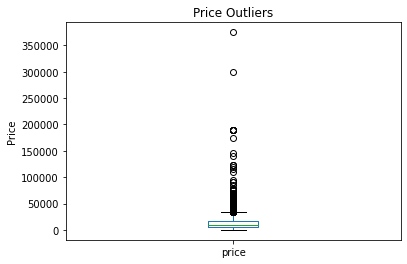

In [69]:
#see outliers visually in boxplot
plt.title('Price Outliers')
plt.ylabel("Price")
data.boxplot(column =['price'], grid = False)

<AxesSubplot:title={'center':'Price Outliers'}, xlabel='Price', ylabel='# of Cars'>

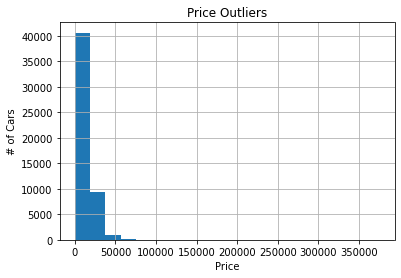

In [70]:
#see outliers visually in histogram
plt.title('Price Outliers')
plt.xlabel("Price")
plt.ylabel("# of Cars")
data['price'].hist(bins=20)

In [71]:
#info used to determine standard deviation
data['price'].describe()

count    50976.00
mean     12130.93
std      10042.10
min          1.00
25%       5000.00
50%       9000.00
75%      16800.00
max     375000.00
Name: price, dtype: float64

In [72]:
price_max_value = data['price'].mean() + 2 * data['price'].std()
price_max_value

32215.13390439532

In [73]:
#mean+- 2 std will capture 95% of the data based on the central limite theorem
print(data.shape)
clean_price = data[ data['price'] <= 32214.070950828373]
print(clean_price.shape)

(50976, 20)
(48913, 20)


<AxesSubplot:title={'center':'Price Histogram - Outliers Removed'}, xlabel='Price', ylabel='# of Cars'>

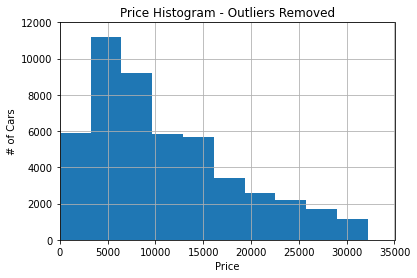

In [74]:
plt.title('Price Histogram - Outliers Removed')
plt.xlabel("Price")
plt.ylabel('# of Cars')
plt.ylim([0, 12000])
plt.xlim([0, 35000])
clean_price['price'].hist()

### model_year

<AxesSubplot:title={'center':'Model Year Outliers'}, xlabel='# of Cars', ylabel='Year'>

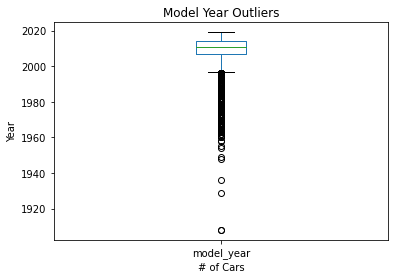

In [76]:
plt.title('Model Year Outliers')
plt.xlabel('# of Cars')
plt.ylabel("Year")
data.boxplot(column =['model_year'], grid = False)

<AxesSubplot:title={'center':'Model Year Outliers'}, xlabel='Year', ylabel='# of Cars'>

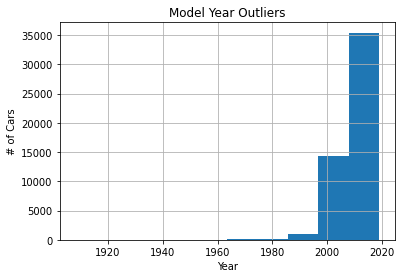

In [77]:
plt.title('Model Year Outliers')
plt.ylabel("# of Cars")
plt.xlabel("Year")
data['model_year'].hist()

In [78]:
#info used to determine standard deviation
data['model_year'].describe()

count   50976.00
mean     2009.86
std         6.18
min      1908.00
25%      2007.00
50%      2011.00
75%      2014.00
max      2019.00
Name: model_year, dtype: float64

In [79]:
# mean + 2*std

2009.614856 + 2*5.925922

2021.4667

In [80]:
# mean - 2*std

2009.614856 - 2*5.925922

1997.763012

In [81]:
# mean+- 2 std will capture 95% of the data based on the central limite theorem

print(data.shape)
clean_year = data[ data['model_year'] <= 2021.4667]
clean_year = data[ data['model_year'] >= 1997.763012]
print(clean_year.shape)

(50976, 20)
(49449, 20)


<AxesSubplot:title={'center':'Model Year - Outliers Removed'}, xlabel='Year', ylabel='# of Cars'>

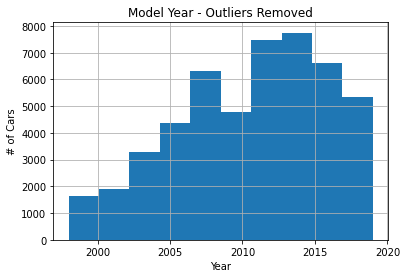

In [82]:
plt.title('Model Year - Outliers Removed')
plt.ylabel("# of Cars")
plt.xlabel("Year")
clean_year['model_year'].hist()
#AGE STEP SIX

<AxesSubplot:title={'center':'Model Year - Outliers Removed'}, xlabel='# of Cars', ylabel='Year'>

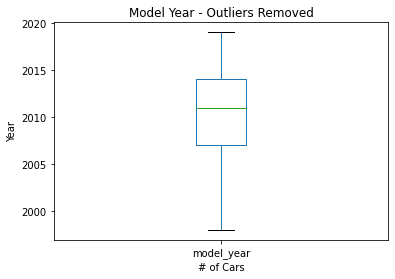

In [83]:
plt.title('Model Year - Outliers Removed')
plt.ylabel("Year")
plt.xlabel("# of Cars")
clean_year.boxplot( column =['model_year'], grid = False)
#AGE STEP SEVEN

### odometer

<AxesSubplot:title={'center':'Odometer Outliers'}, xlabel='# of Cars', ylabel='Odometer'>

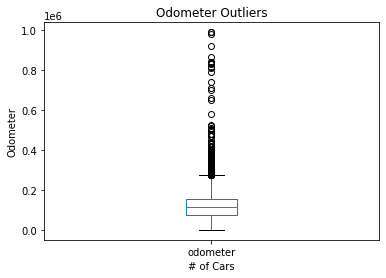

In [84]:
#see outliers visually in boxplot
plt.title('Odometer Outliers')
plt.ylabel("Odometer")
plt.xlabel("# of Cars")
data.boxplot( column =['odometer'], grid = False)

<AxesSubplot:title={'center':'Odometer Outliers'}, xlabel='# of Cars', ylabel='Odometer'>

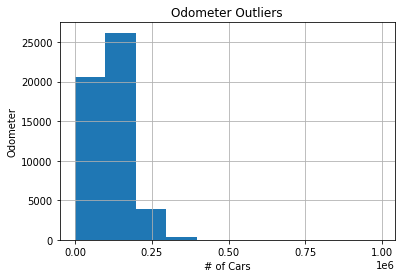

In [85]:
#see outliers visually in histogram
plt.title('Odometer Outliers')
plt.ylabel("Odometer")
plt.xlabel("# of Cars")
plt.xticks([0*1e6, 0.25*1e6, 0.5*1e6, 0.75*1e6, 1*1e6])
data['odometer'].hist()

In [86]:
data['odometer'].describe()

count    50976.00
mean    115294.89
std      62415.62
min          0.00
25%      73022.50
50%     114000.00
75%     153858.75
max     990000.00
Name: odometer, dtype: float64

In [87]:
117628.287645 + 2*58972.868781

235574.025207

In [88]:
print(data.shape)
clean_odo = data[  data['odometer'] <= 235574.025207 ]
print(clean_odo.shape)

(50976, 20)
(49363, 20)


<AxesSubplot:title={'center':'Odometer - Outliers Removed'}, xlabel='Odometer', ylabel='# of Cars'>

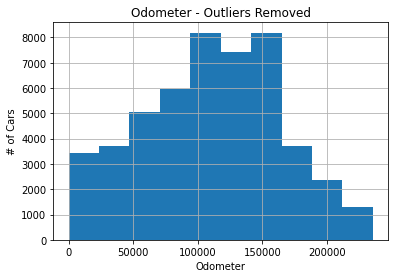

In [89]:
plt.title('Odometer - Outliers Removed')
plt.ylabel("# of Cars")
plt.xlabel("Odometer")
clean_odo['odometer'].hist()

<AxesSubplot:title={'center':'Odometer - Outliers Removed'}, xlabel='# of Cars', ylabel='Odometer'>

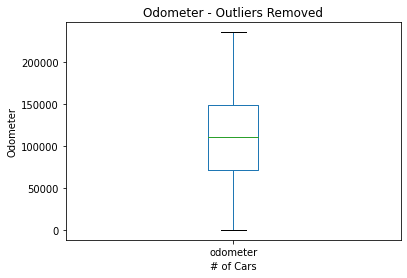

In [90]:
plt.title('Odometer - Outliers Removed')
plt.ylabel("Odometer")
plt.xlabel("# of Cars")
clean_odo.boxplot( column =['odometer'], grid = False)

### cylinders 

<AxesSubplot:title={'center':'Cylinders Outliers'}, xlabel='# of Cars', ylabel='Cylinders'>

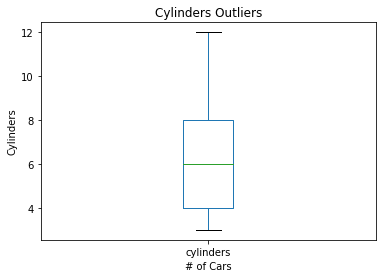

In [91]:
#see outliers visually in boxplot
plt.title('Cylinders Outliers')
plt.ylabel("Cylinders")
plt.xlabel("# of Cars")
data.boxplot( column =['cylinders'], grid = False)

<AxesSubplot:title={'center':'Cylinders Outliers'}, xlabel='Cylinders', ylabel='# of Cars'>

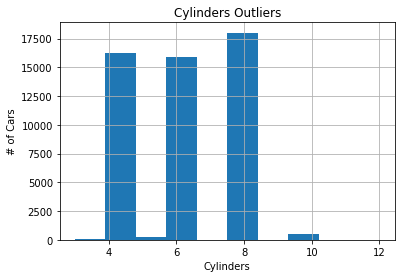

In [92]:
#see outliers visually in histogram
plt.title('Cylinders Outliers')
plt.ylabel("# of Cars")
plt.xlabel("Cylinders")
data['cylinders'].hist()

In [93]:
data['cylinders'].describe()

count   50976.00
mean        6.11
std         1.69
min         3.00
25%         4.00
50%         6.00
75%         8.00
max        12.00
Name: cylinders, dtype: float64

In [94]:
6.047045 + 2*1.574255

9.195554999999999

In [95]:
6.047045 - 2*1.574255

2.898535

In [96]:
print(data.shape)
clean_cyl = data[data['cylinders'] <= 9.195554999999999 ]
print(clean_cyl.shape)

(50976, 20)
(50430, 20)


<AxesSubplot:title={'center':'Cylinders - Outliers Removed'}, xlabel='Cylinders', ylabel='# of Cars'>

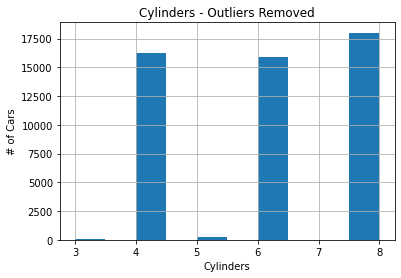

In [97]:
plt.title('Cylinders - Outliers Removed')
plt.ylabel("# of Cars")
plt.xlabel("Cylinders")
clean_cyl['cylinders'].hist()

Above I notice there are no cylinders in the odd number categories: 3, and 5. I should remove them, what is the best way?


<AxesSubplot:title={'center':'Cylinders - Outliers Removed'}, xlabel='# of Cars', ylabel='Cylinders'>

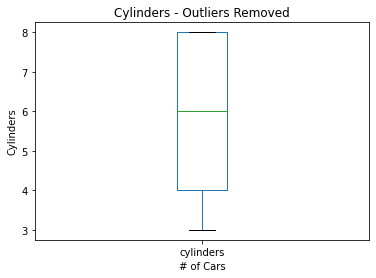

In [98]:
plt.title('Cylinders - Outliers Removed')
plt.ylabel("Cylinders")
plt.xlabel("# of Cars")
clean_cyl.boxplot( column =['cylinders'], grid = False)

In [99]:
data['cylinders'] = data['cylinders'].apply(lambda x: 4 if x==3 else x)
data['cylinders'] = data['cylinders'].apply(lambda x: 6 if x==5 else x)
data['cylinders'] = data['cylinders'].apply(lambda x: 8 if x==7 else x)
data['cylinders'] = data['cylinders'].apply(lambda x: 8 if x>8 else x)

<AxesSubplot:title={'center':'Cylinders - Outliers Removed'}, xlabel='Cylinders', ylabel='# of Cars'>

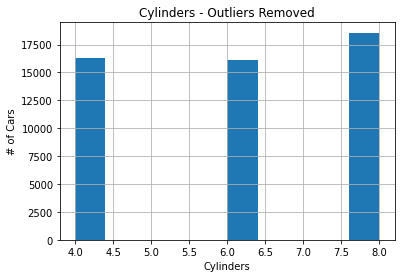

In [100]:
plt.title('Cylinders - Outliers Removed')
plt.ylabel("# of Cars")
plt.xlabel("Cylinders")
data['cylinders'].hist()

# Conclusion

## Study core parameters without outliers

#### price conclusion 

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

In [101]:
#after i remove outliers, my stats become more significant 
data['price'].describe()

count    50976.00
mean     12130.93
std      10042.10
min          1.00
25%       5000.00
50%       9000.00
75%      16800.00
max     375000.00
Name: price, dtype: float64

In [102]:
print('after outliers are removed for price: ')
clean_price['price'].describe()

after outliers are removed for price: 


count   48913.00
mean    10894.92
std      7544.91
min         1.00
25%      4995.00
50%      8900.00
75%     15500.00
max     32211.00
Name: price, dtype: float64

For the count, we lost 2089 or 4% of our dataframe. I see this as an acceptable percentage to remove as outliers. The mean price went down roughly $2,000 after outliers removed, std also descreased. Minimum is the only number than didn't change. The 25% had less change (5000 to 4995) compared to 75% (16839 to 15500) - this tells me the outliers resulted in a price estimate that was too high. I descreased the variety of price, therefore increasing my stat power

<AxesSubplot:title={'center':'Price of Cars with Outliers'}, xlabel='Price', ylabel='# of Cars'>

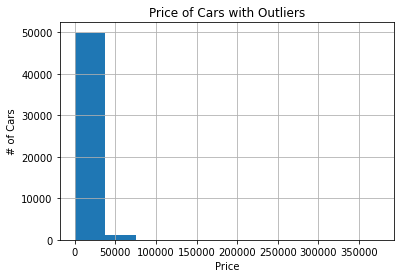

In [103]:
plt.title('Price of Cars with Outliers')
plt.xlabel("Price")
plt.ylabel("# of Cars")
data['price'].hist()

<AxesSubplot:title={'center':'Price of Cars - Outliers Removed'}, xlabel='Price', ylabel='# of Cars'>

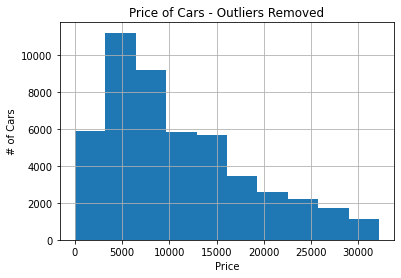

In [104]:
plt.title('Price of Cars - Outliers Removed')
plt.xlabel("Price")
plt.ylabel("# of Cars")
clean_price['price'].hist()

with the clean data, you can clearly see where price is represented in the bulk of the dataframe. clean histograms allow conclusions with accuracy. For example: I CONCLUDE THE MAJORITY OF CARS ARE PRICED BETWEEN $4,000 - $10,000 IN THIS DATAFRAME

#### model year conclusion

In [105]:
data['model_year'].describe()

count   50976.00
mean     2009.86
std         6.18
min      1908.00
25%      2007.00
50%      2011.00
75%      2014.00
max      2019.00
Name: model_year, dtype: float64

In [106]:
clean_year['model_year'].describe()

count   49449.00
mean     2010.47
std         4.94
min      1998.00
25%      2007.00
50%      2011.00
75%      2014.00
max      2019.00
Name: model_year, dtype: float64

For the count, we lost 1254 or 2.5% of our dataframe. I see this as an acceptable percentage to remove as outliers. The model year mean value went up roughly 1 year after outliers removed, however our std went down. For model year, I removed outliers existed on the lower end. The clean data minimum increased by 90 years, however the 25%,50%,75% stayed the same. This tells me removing the outliers had a small benefit on my stats. 

<AxesSubplot:title={'center':'Model Year with Outliers'}, xlabel='Model Year', ylabel='Price'>

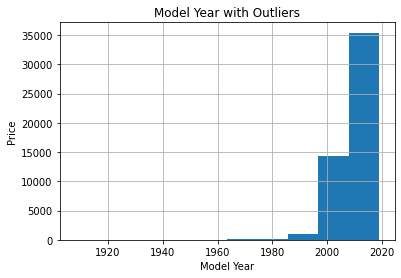

In [107]:
plt.title('Model Year with Outliers')
plt.xlabel("Model Year")
plt.ylabel("Price")
data['model_year'].hist()

<AxesSubplot:title={'center':'Model Year - Outliers Removed'}, xlabel='Model Year', ylabel='Price'>

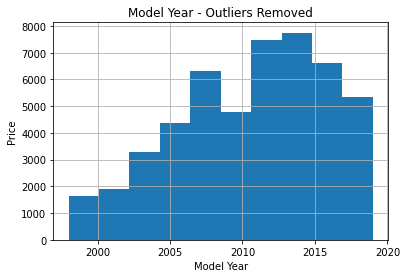

In [108]:
plt.title('Model Year - Outliers Removed')
plt.xlabel("Model Year")
plt.ylabel("Price")
clean_year['model_year'].hist()

with the clean data, you can clearly see  the majority of outliers live above 1995. clean histograms allow conclusions with accuracy. For example: I CONCLUDE MAJOIRTY OF CARS ARE MADE BETWEEN 1995 - 2019 WITHIN THIS DATAFRAME

#### odometer conclusion

In [109]:
data['odometer'].describe()

count    50976.00
mean    115294.89
std      62415.62
min          0.00
25%      73022.50
50%     114000.00
75%     153858.75
max     990000.00
Name: odometer, dtype: float64

In [110]:
clean_odo['odometer'].describe()

count    49363.00
mean    109897.46
std      54216.52
min          0.00
25%      71000.00
50%     111123.00
75%     149000.00
max     235400.00
Name: odometer, dtype: float64

For the count, we lost 1613 or 3% of our dataframe. I see this as an acceptable percentage to remove as outliers. The odometer mean value went down roughly 1400 miles after outliers removed, std went from 59909 - 51306. For odometer, I removed outliers existed on the higher end. The clean data maximum decreased by 754600.0 miles!!! This had less effect on my 25%, 50%, and 75%...outliers must has minimal effect on stats 

<AxesSubplot:title={'center':'Odometer with Outliers'}, xlabel='Odometers', ylabel='# of Cars'>

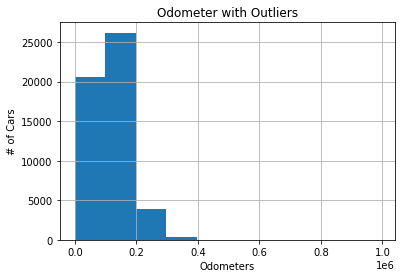

In [111]:
plt.title('Odometer with Outliers')
plt.xlabel("Odometers")
plt.ylabel("# of Cars")
data['odometer'].hist()

In [112]:
data['odometer'].max()

990000

Advice?? How do I fix the X axis range?

<AxesSubplot:title={'center':'Odometer - Outliers Removed'}, xlabel='Odometers', ylabel='# of Cars'>

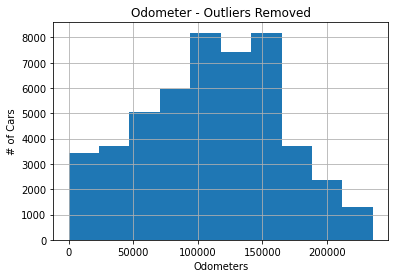

In [113]:
plt.title('Odometer - Outliers Removed')
plt.xlabel("Odometers")
plt.ylabel("# of Cars")
clean_odo['odometer'].hist()

with the clean data, you can clearly see the bulk of data has 75k-150k miles. clean histograms allow conclusions with accuracy. 

#### cylinders conclusion 

In [114]:
data['cylinders'].describe()

count   50976.00
mean        6.09
std         1.65
min         4.00
25%         4.00
50%         6.00
75%         8.00
max         8.00
Name: cylinders, dtype: float64

In [115]:
clean_cyl['cylinders'].describe()

count   50430.00
mean        6.06
std         1.65
min         3.00
25%         4.00
50%         6.00
75%         8.00
max         8.00
Name: cylinders, dtype: float64

For count, 551 rows has outliers, 1% of the dataframe. 25%,50%,75% remained the same. Removing the maximum outliers was useful but didn't make a difference in stats

<AxesSubplot:title={'center':'Cylinders with Outliers'}, xlabel='Cylinders', ylabel='# of Cars'>

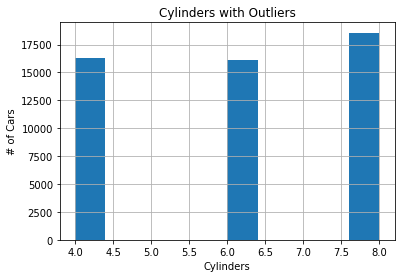

In [116]:
plt.title('Cylinders with Outliers')
plt.xlabel("Cylinders")
plt.ylabel("# of Cars")

data['cylinders'].hist()



<AxesSubplot:title={'center':'Cylinders -  Outliers Removed'}, xlabel='Cylinders', ylabel='# of Cars'>

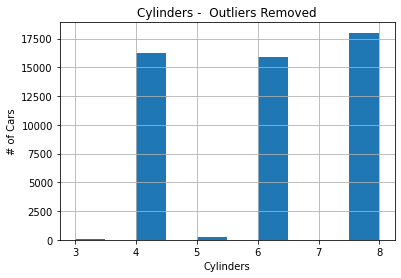

In [117]:
plt.title('Cylinders -  Outliers Removed')
plt.xlabel("Cylinders")
plt.ylabel("# of Cars")

clean_cyl['cylinders'].hist()

My conclusions don't change much with the clean data, I can see 6 cylinders is the most common, then 8, then 4. The graph did become visually presentable

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [118]:
data['days_listed'].describe()

count   50976.00
mean       39.54
std        28.20
min         0.00
25%        19.00
50%        33.00
75%        53.00
max       271.00
Name: days_listed, dtype: float64

In [119]:
#1. mean
print('mean',data['days_listed'].describe()['mean'])
#2. median
print('median',data['days_listed'].describe()['50%'])

#3.describe typical lifetime of an ad
#ads typically last 19-53 days, 40 days on average, never over 275 days

#Outliers tend to be high, making mean>median. Max is 271, 75% is 53
#if these were closer in value I would not suspect outliers




mean 39.54262790332706
median 33.0


In [120]:
limit = 1.6* 28.20 # our target limit is 1.6 x std
mean = 39.54

In [121]:
#4.determine when ads were removed quickly
lower_case = data[data['days_listed']<=(mean-limit)]
display(len(lower_case))
print('you can not sell a car in negative days')
# based on our limit, there's no car which was sold too quickly
#no outlier on the lower end

0

you can not sell a car in negative days


In [122]:
zero_days= data[data['days_listed']==0]
display(len(zero_days))
print('54 cars were sold in less than a day')

54

54 cars were sold in less than a day


In [123]:
#5.determin when ads were posted for a long period of time
upper_case = data[data['days_listed']>=(mean+limit)]
display(len(upper_case))
print('3779 cars sold after 84 days')
# based on our limit, there are 3779 cars sold beyond 84 days, these are our outliers


3779

3779 cars sold after 84 days


<AxesSubplot:title={'center':'Days Listed'}, xlabel='# of Days', ylabel='# of Cars'>

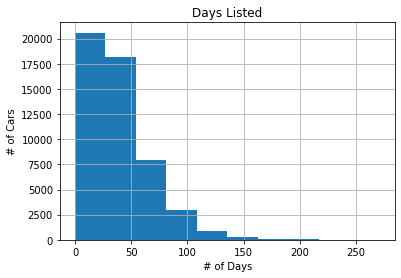

In [124]:
plt.title('Days Listed')
plt.xlabel("# of Days")
plt.ylabel("# of Cars")


data['days_listed'].hist()

I base the typical lifetime of an add between 18 - 50 days, using 25% and 75% of the dataframe. 

<AxesSubplot:>

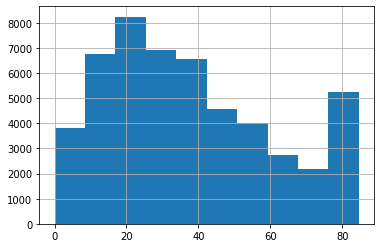

In [125]:
# use lamba X: apply to elim outliers
#cap any value <mean+limit of days
data['days_listed'] = data['days_listed'].apply(lambda x: mean+limit if x> mean+limit else x)
data['days_listed'].hist()

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

Number of ads I assume is 51525, the number of cars in our dataframe. I need to research how to find the average price based on each vechile type. Not sure how.

In [126]:
temp1 = data['type'].value_counts().reset_index()
temp1.sort_values("type")
temp1
#SUV and truck are the most common types in this dataframe, I would also consider sedan common

,index,type
0,SUV,12273
1,truck,12233
2,sedan,12024
3,pickup,6902
4,coupe,2282
5,wagon,1524
6,mini-van,1145
7,hatchback,1040
8,van,621
9,convertible,441


In [127]:
cols = ['type','price']
temp2 = data[cols].groupby('type').median().reset_index()
temp2.sort_values("price", ascending=False)
#truck and pickups have the highest average price in our dataframe

,type,price
10,truck,14995
8,pickup,14400
3,coupe,12925
2,convertible,12000
6,offroad,11800
1,bus,10500
7,other,8995
0,SUV,8900
11,van,7990
12,wagon,7900


In [128]:
#SUV and truck are the most common types in this dataframe, I would also consider sedan common
#truck and pickups have the highest average price in our dataframe

#therefore I conclude that the number of ads does not correlate with the average price for each type of vehicle
#just bc a car has a high price, does not mean it has a high number of ads

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

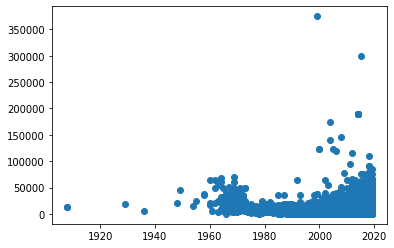

In [129]:
# price vs age
# scatterplot of prce vs age show the relationship
plt.scatter(data['model_year'], data['price']);

In [130]:
#calculate correlations btw price age
print(data['model_year'].corr(data['price']))
# corr .4 this relatively strong
#positive corr means if the model_year is high (new car), the price will also be high

0.42623673390883593


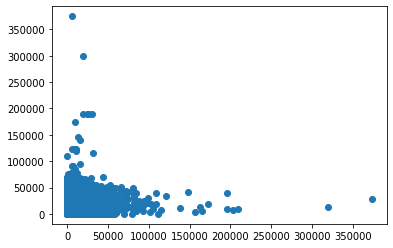

In [131]:
# price vs mileage
# scatterplot of prce vs mileage show the relationship
plt.scatter(data['annual_mileage'], data['price']);

In [132]:
#calculate correlations btw price and mileage
print(data['annual_mileage'].corr(data['price']))
#below .2 is weak - implies the average miles per year does not impact price

0.15735352338299569


In [133]:
# price v transmission 
cols = ['transmission','price']
temp3 = data[cols].groupby('transmission').median().reset_index()
temp3.sort_values("price", ascending=False)
#in real life, four types of transmissions exist: AT(auto), MT(manual),AMT(auto/manu), CVT(continuously variable) 
#i assume other represents AMT+CVT trans = highest average price

,transmission,price
2,other,21100
0,automatic,8999
1,manual,6916


(0.0, 100000.0)

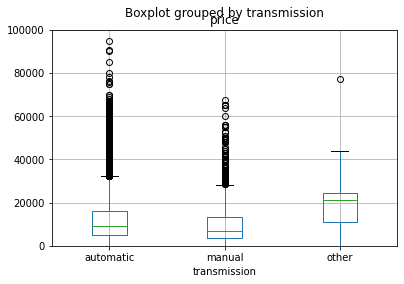

In [134]:
# boxplot price vs trans

data.boxplot('price', 'transmission')
plt.ylim(0, 100000)
#automatic and manual boxplot at similar price ranges
#it appears the transmission type does not have a strong affect price 

In [135]:
# price v color
cols = ['paint_color','price']
temp4 = data[cols].groupby('paint_color').median().reset_index()
temp4.sort_values("price", ascending=False)

,paint_color,price
12,yellow,17490
6,orange,15700
11,white,11500
0,black,10995
7,other,9400
9,red,8750
5,grey,8500
10,silver,7999
3,custom,7995
1,blue,7500


(0.0, 100000.0)

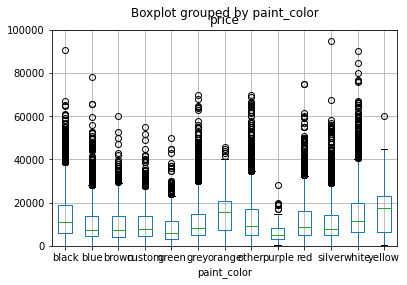

In [136]:
data.boxplot('price', 'paint_color')
plt.ylim(0, 100000)
#i do not observe a color that has a significantly high average price in this boxplot
#i conclude the paint color doesn't affect price

[Make use of correlation matrix and correlation plots]

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

<div class="alert alert-block alert-info">
<b>Conclusion for missing values:</b> <a class="tocSkip"></a>


is_4wd is filled with 0, and paint color is filled with other. accuracy is not needed so bins are not needed.
model_year, cyl, odo need more steps for filling values bc filling with median or mode is less accurate than bins. 

</div>

<div class="alert alert-block alert-info">
<b>Conclusion for fixing data types:</b> <a class="tocSkip"></a>

Perform astype() on columns. Make floats into int so it's easy to read. Make objects into int if they have numeric values. Int allows operations to be performed on data
</div>

<div class="alert alert-block alert-info">
<b>Conclusion for enrich data:</b> <a class="tocSkip"></a>

Making more columns like day_of_week, date, month, year, and ads_placed. Used for analysis to find vechile age and annual mileage 
    
</div>

<div class="alert alert-block alert-info">
<b>Conclusion for removing outliers:</b> <a class="tocSkip"></a>

With boxplot and histograms I was able to visualize outliers in price, model_year, odometer, & cylinders. I was able to eliminate the outliers using data[''].mean() +or- 2 * data[''].std().
    
</div>

In [137]:
clean_price.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,day_of_week,date,month,year,vehicle_age,annual_mileage
price,1.00,0.46,0.34,-0.42,0.31,-0.00,-0.00,-0.00,-0.01,0.00,-0.45,0.17
model_year,0.46,1.00,-0.12,-0.51,-0.00,-0.00,-0.01,0.00,-0.01,0.01,-1.00,0.43
cylinders,0.34,-0.12,1.00,0.08,0.38,0.00,-0.00,-0.00,0.00,0.00,0.12,-0.02
odometer,-0.42,-0.51,0.08,1.00,0.07,0.00,0.00,-0.00,0.01,-0.01,0.51,0.23
is_4wd,0.31,-0.00,0.38,0.07,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.04
days_listed,-0.00,-0.00,0.00,0.00,0.00,1.00,0.00,-0.00,-0.01,0.01,0.00,-0.00
day_of_week,-0.00,-0.01,-0.00,0.00,0.00,0.00,1.00,0.00,0.01,-0.01,0.01,-0.00
date,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,1.00,0.03,-0.06,-0.01,0.01
month,-0.01,-0.01,0.00,0.01,0.00,-0.01,0.01,0.03,1.00,-0.82,-0.05,0.11
year,0.00,0.01,0.00,-0.01,-0.00,0.01,-0.01,-0.06,-0.82,1.00,0.07,-0.13


<div class="alert alert-block alert-info">
<b>What sells a car?:</b> <a class="tocSkip"></a>
1. The strongest corrletion for what sells a car is model_year & odometer. When model year is high(new), price is high = positive corr. When odometer is high, price is low = negative corr.
2. Less correlated but still recongized correlations are cylinders, is_4wd. Having 4wd can increase price sometimes. Having more cylinders can sometimes increase price. 
3. Little to no corrleation with remaining columns 


</div>